In [53]:
#This is a collection of Etherium cryptocurrency data downloaded from yahoo in a comma-separated values file format.
#The website is provided below.
#https://finance.yahoo.com/quote/ETH-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAADS_bJql7Bsz7eL6IxZwPnO6e0wXwMCr9Jrt6W-YBC5-XCCWMdQXUD3KV9tFpiRe2Ww8OwaBpnr151xz2xUtqgi8_p3TQcxRPabz7etk_P3jBjW-oq9ULJwMTqNgwFB1NfnuImqNhV2AOiiPTnVEqKs3gRfAbQ5Hqcf9f_FcLQ1
import numpy as np
import pandas as pd

In [55]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import datetime

#Statsmodels is a Python package that allows users to explore data, including time-series
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

#sklearn library contains a lot of efficient tools for machine learning and statistical modeling
#including classification, regression, clustering and dimensionality reduction.
from sklearn.metrics import mean_squared_error

In [36]:
dataframe = pd.read_csv('ETH-USD.csv', parse_dates=['Date'])
dataframe.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-06,3549.708984,3549.708984,3335.376709,3418.408203,3418.408203,24293791313
1,2022-01-07,3417.837891,3420.461914,3117.381348,3193.210449,3193.210449,24494179209
2,2022-01-08,3193.502441,3240.304443,3020.880859,3091.972656,3091.972656,16037732700
3,2022-01-09,3091.696289,3206.790771,3075.911377,3157.751465,3157.751465,12334683863
4,2022-01-10,3157.570557,3177.213379,2947.683594,3083.097900,3083.097900,19535744145
5,2022-01-11,3082.990967,3247.511963,3061.140625,3238.111572,3238.111572,15211447193
6,2022-01-12,3238.449951,3401.219971,3216.718018,3372.258301,3372.258301,16662871689
7,2022-01-13,3372.104980,3396.969727,3247.917480,3248.288574,3248.288574,15294466275
8,2022-01-14,3248.648682,3330.766113,3203.823730,3310.001465,3310.001465,13562957230
9,2022-01-15,3309.844238,3364.537842,3278.670898,3330.530762,3330.530762,9619999078


In [37]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

print (dataframe.describe())
print ()
print ("=============================================================")
print ()
print (dataframe.dtypes)

              Open         High          Low        Close    Adj Close  \
count   361.000000   361.000000   361.000000   361.000000   361.000000   
mean   1967.456331  2017.871310  1907.142311  1960.926294  1960.926294   
std     755.706844   771.550917   735.687897   752.186383   752.186383   
min     993.400635  1073.052612   896.109009   993.636780   993.636780   
25%    1294.456543  1316.330078  1267.708496  1294.216797  1294.216797   
50%    1662.695435  1718.183228  1610.099243  1657.059204  1657.059204   
75%    2729.116455  2802.315430  2596.989990  2694.979736  2694.979736   
max    3549.708984  3573.960205  3442.000244  3522.833496  3522.833496   

             Volume  
count  3.610000e+02  
mean   1.530498e+10  
std    6.921130e+09  
min    2.399675e+09  
25%    1.064592e+10  
50%    1.519706e+10  
75%    1.855708e+10  
max    4.574340e+10  


Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               f

In [38]:
dF = dataframe[['Date','Close']]
dF.head(10)

,Date,Close
0,2022-01-06,3418.408203
1,2022-01-07,3193.210449
2,2022-01-08,3091.972656
3,2022-01-09,3157.751465
4,2022-01-10,3083.097900
5,2022-01-11,3238.111572
6,2022-01-12,3372.258301
7,2022-01-13,3248.288574
8,2022-01-14,3310.001465
9,2022-01-15,3330.530762


In [39]:
#Setting date as index
#testing the beginning and the end of the data
dataFrame_timeSeries = dF.set_index('Date')
dataFrame_timeSeries.sort_index(inplace=True)
print (type(dataFrame_timeSeries))
print (dataFrame_timeSeries.head(5))
print ()
print ("========================")
print ()
print (dataFrame_timeSeries.tail(5))

<class 'pandas.core.frame.DataFrame'>
                  Close
Date                   
2022-01-06  3418.408203
2022-01-07  3193.210449
2022-01-08  3091.972656
2022-01-09  3157.751465
2022-01-10  3083.097900


                  Close
Date                   
2022-12-28  1189.986084
2022-12-29  1201.595337
2022-12-30  1199.232788
2022-12-31  1196.771240
2023-01-01  1200.964844


<AxesSubplot:xlabel='Date'>

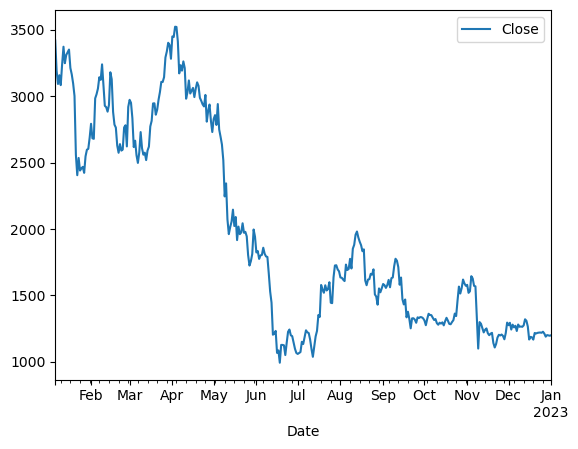

In [40]:
#test show graph
dataFrame_timeSeries.plot()

In [47]:
#https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/

#Augmented Dickey Fuller Test (ADF Test)
def ADF(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print('Results of the ADF Test:')
    print ("==============================================")
    
    ADFTest = adfuller(timeseries, autolag='AIC')
    
    ADFResult = pd.Series(ADFTest[0:4], index=['ADF Statistic', 'p-value', 'n-lags', 'Counts'])
    
    for key, value in ADFTest[4].items():
        ADFResult['Critical Value (%s)'%key] = value
    
    print(ADFResult)

In [48]:
#Testing the ADF test

TimeSeries = dataFrame_timeSeries['Close']
ADF(TimeSeries)

Results of the ADF Test:
ADF Statistic            -0.954278
p-value                   0.769573
n-lags                   15.000000
Counts                  345.000000
Critical Value (1%)      -3.449447
Critical Value (5%)      -2.869954
Critical Value (10%)     -2.571253
dtype: float64


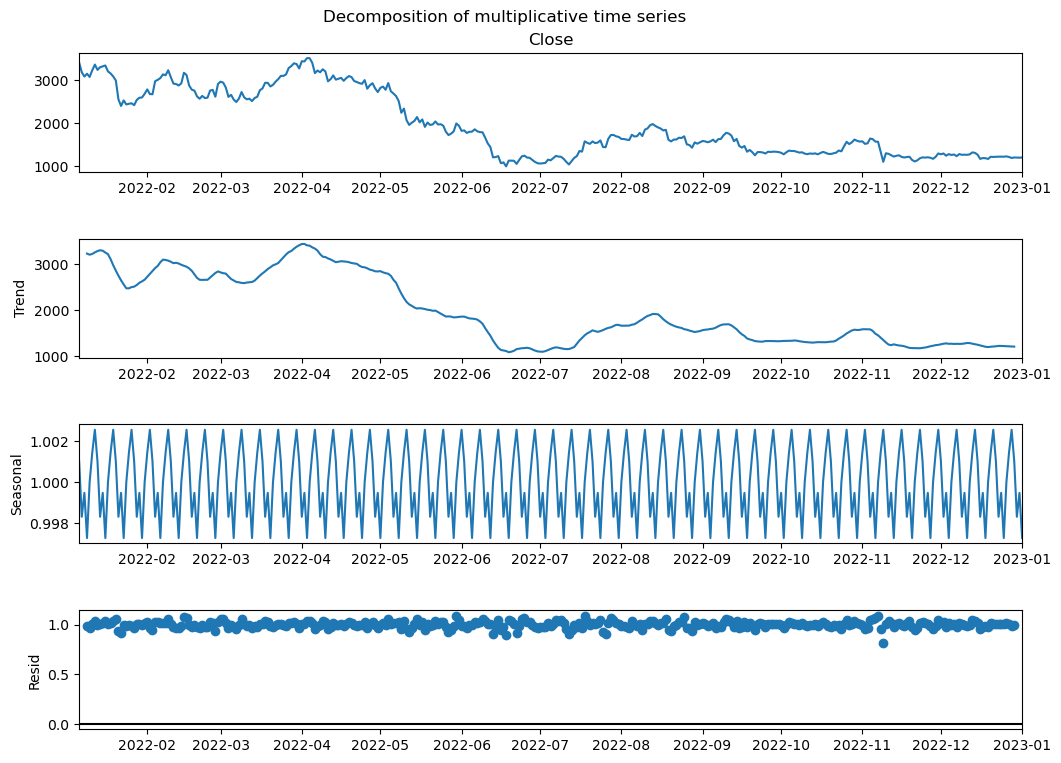

In [65]:
#https://towardsdatascience.com/time-series-from-scratch-decomposing-time-series-data-7b7ad0c30fe7
#https://www.abs.gov.au/websitedbs/d3310114.nsf/home/time+series+analysis:+the+basics#:~:text=In%20the%20multiplicative%20model%2C%20the,trend%2C%20seasonal%20and%20irregular%20components.&text=Under%20this%20model%2C%20the%20trend,unitless%20factors%2C%20distributed%20around%201.

decompositionTimeSeries = sm.tsa.seasonal_decompose(TimeSeries, model='multiplicative')

ts = decomposition.plot()
ts.set_figwidth(12)
ts.set_figheight(8)
ts.suptitle('Decomposition of multiplicative time series')
plt.show()

C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\chris\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  361
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -2122.271
Date:                Fri, 06 Jan 2023   AIC                           4256.542
Time:                        10:04:00   BIC                           4279.859
Sample:                    01-06-2022   HQIC                          4265.813
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0312      0.046      0.678      0.498      -0.059       0.121
ar.L2         -0.0207      0.046     -0.454      0.650      -0.110       0.069
ar.L3          0.1383      0.053      2.617      0.0

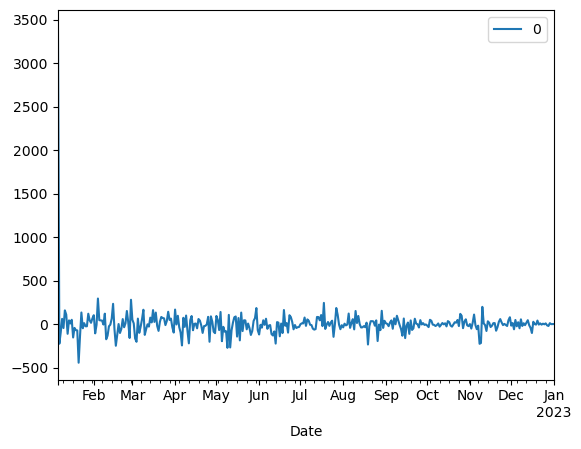

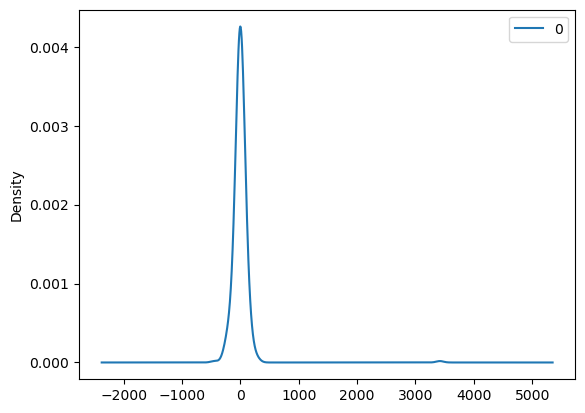

                 0
count   361.000000
mean      3.722439
std     200.439170
min    -444.116207
25%     -43.920164
50%      -3.669461
75%      42.344764
max    3418.408203


In [64]:
crypto_data = {}
crypto_data['Etherium'] = pd.read_csv('ETH-USD.csv', parse_dates=['Date'])
dataFrameEtherium = pd.DataFrame(crypto_data['Etherium'])
dataFrameEtherium = dataFrameEtherium[['Date','Close']]
dataFrameEtherium.set_index('Date', inplace = True)

M = sm.tsa.arima.ARIMA(dataFrameEtherium, order=(5,1,0))
MF_Result = model.fit()
print(MF_Result.summary())
#set remaining errors
R_Errors = DataFrame(MF_Result.resid)
R_Errors.plot()
plt.show()
R_Errors.plot(kind='kde')
plt.show()
print(R_Errors.describe())

Test MSE: 3518.135


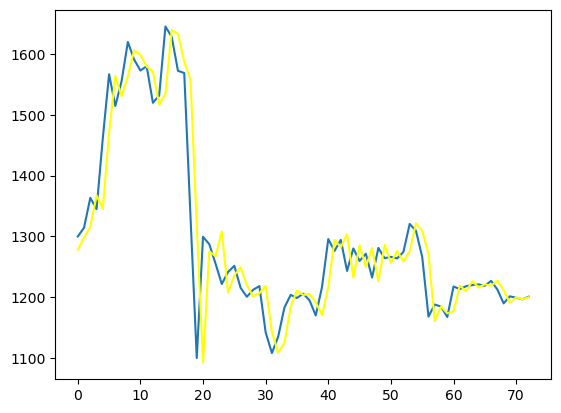

In [73]:
#Prediction values

Etherium = dataFrameEtherium.values
size = int(len(Etherium) * 0.80)
train, test = Etherium[0:size], X[size:len(Etherium)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    Eth_Prediction = model.fit()
    output = Eth_Prediction.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='yellow')
plt.show()